# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"

cloudiness = []
country= []
date =[]    
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
update_cities = []
count = 0

# Loop through the list of cities and perform a request for data on each
full_url = url + "appid=" + weather_api_key + "&q=" 
print(full_url)

http://api.openweathermap.org/data/2.5/weather?appid=957fe8db5f84fd08cd374ae86b7ede17&q=


In [7]:
# Loop through the list of cities and perform a request for data on each
for city in cities:
    query_url = full_url + city
    response = requests.get(query_url).json()
    time.sleep(2)
    count += 1
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_fah = ((response["main"]["temp_max"] - 273.15) * 9/5) + 32
        max_temp.append(temp_fah)
        wind_mph = response["wind"]["speed"] * 2.237
        wind_speed.append(wind_mph) 
        update_cities.append(city)
        set_num = response["sys"]["type"]
        print(f"Processing Record {count} of set {set_num} | {city}")
    except:
        print("City not found. Skipping...")
        pass

print("Finish Downloading")

Processing Record 1 of set 1 | albany
Processing Record 2 of set 3 | mataura
City not found. Skipping...
Processing Record 4 of set 1 | vasyshcheve
Processing Record 5 of set 1 | bredasdorp
Processing Record 6 of set 1 | hilo
Processing Record 7 of set 1 | germenchik
City not found. Skipping...
Processing Record 9 of set 1 | fairbanks
City not found. Skipping...
Processing Record 11 of set 1 | cape town
Processing Record 12 of set 1 | bethel
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 17 of set 1 | nikolskoye
City not found. Skipping...
Processing Record 19 of set 3 | kaseda
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of set 1 | ancud
Processing Record 23 of set 3 | bluff
Processing Record 24 of set 1 | ushuaia
City not found. Skipping...
Processing Record 26 of set 3 | hamada
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of set 1 | slave

Processing Record 241 of set 1 | mahebourg
City not found. Skipping...
Processing Record 243 of set 1 | tasiilaq
Processing Record 244 of set 1 | broken hill
City not found. Skipping...
City not found. Skipping...
Processing Record 247 of set 1 | nara
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 251 of set 1 | eastbourne
Processing Record 252 of set 1 | aykhal
Processing Record 253 of set 1 | flinders
Processing Record 254 of set 1 | cotonou
City not found. Skipping...
Processing Record 256 of set 1 | grindavik
Processing Record 257 of set 1 | barabash
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 263 of set 1 | georgetown
City not found. Skipping...
City not found. Skipping...
Processing Record 266 of set 1 | rapid city
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. 

Processing Record 483 of set 1 | mustla
City not found. Skipping...
City not found. Skipping...
Processing Record 486 of set 3 | bergerac
Processing Record 487 of set 1 | liverpool
Processing Record 488 of set 1 | zhuhai
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 493 of set 1 | udachnyy
City not found. Skipping...
Processing Record 495 of set 1 | ambon
Processing Record 496 of set 1 | pitimbu
City not found. Skipping...
Processing Record 498 of set 1 | roald
Processing Record 499 of set 1 | bloomsburg
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 504 of set 1 | male
Processing Record 505 of set 1 | vila velha
Processing Record 506 of set 1 | maldonado
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 511 of set 1 | antonina
City not found.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# DataFrame Table

df = pd.DataFrame({"City":update_cities,"Cloudiness":cloudiness,"Country":country,"Date":date,"Humidity":humidity,"Lat":lat,
                  "Lng":lng,"Max Temp":max_temp,"Wind Speed":wind_speed})

df
                  

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,1,US,1584824170,34,42.60,-73.97,46.004,13.86940
1,mataura,46,NZ,1584824172,89,-46.19,168.86,53.006,17.00120
2,corn island,0,NI,1584824174,74,12.17,-83.04,80.258,12.79564
3,vasyshcheve,75,UA,1584824176,86,49.83,36.33,39.200,6.71100
4,bredasdorp,4,ZA,1584824178,72,-34.53,20.04,68.000,5.81620
...,...,...,...,...,...,...,...,...,...
548,shuiji,11,CN,1584825460,95,27.42,118.34,63.698,2.57255
549,forestville,90,US,1584825462,46,38.85,-76.88,53.006,7.78476
550,aksu,99,CN,1584825464,18,41.12,80.26,55.598,8.67956
551,mitsamiouli,90,KM,1584825466,71,-11.38,43.28,83.858,8.34401


In [9]:
df.to_csv(r'C:\Users\aadol\Documents\GitHub\Python_API_Challenge\weatherpy.csv', index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

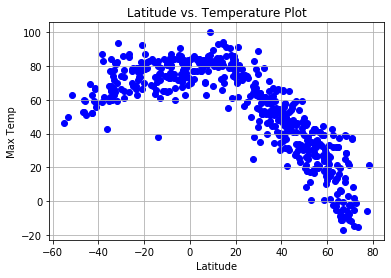

In [46]:
plt.scatter(df["Lat"], df["Max Temp"], color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature Plot")
plt.savefig("..lat_temp.png")
plt.show()


#### Latitude vs. Humidity Plot

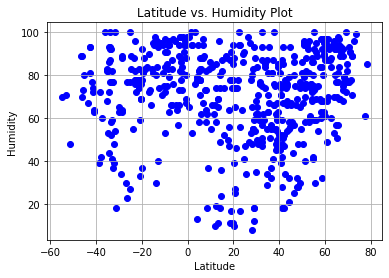

In [45]:
plt.scatter(df["Lat"], df["Humidity"], color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot")
plt.savefig("..lat_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

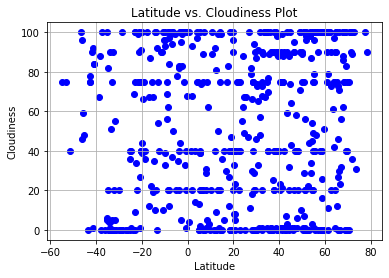

In [44]:
plt.scatter(df["Lat"], df["Cloudiness"], color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness Plot")
plt.savefig("..lat_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

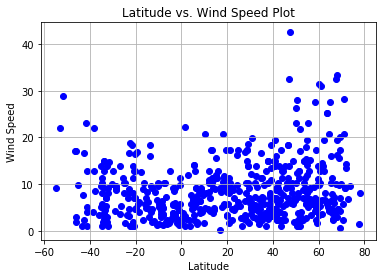

In [43]:
plt.scatter(df["Lat"], df["Wind Speed"], color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed Plot")
plt.savefig("..lat_wind_speed.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

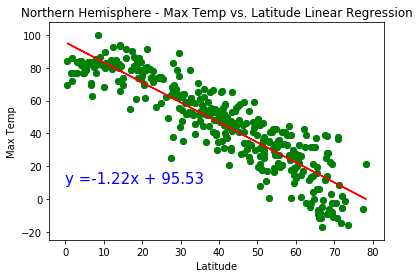

In [42]:
# Northen Hemisphere Latitude vs Max Temp

north_temp = df.loc[df["Lat"] >= 0, ["Lat", "Max Temp"]]

x_values = north_temp["Lat"]
y_values = north_temp["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="blue")
plt.scatter(x_values,y_values,color='green')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("..nh_maxtemp_lr.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

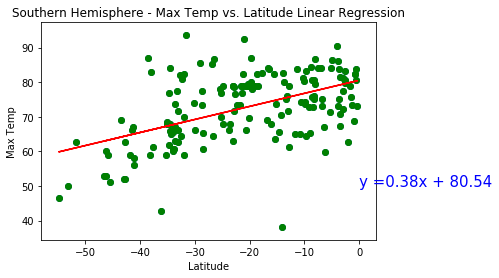

In [41]:
south_temp = df.loc[df["Lat"] <= 0, ["Lat", "Max Temp"]]

x_values = south_temp["Lat"]
y_values = south_temp["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="blue")
plt.scatter(x_values,y_values,color='green')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("..sh_maxtemp_lr.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

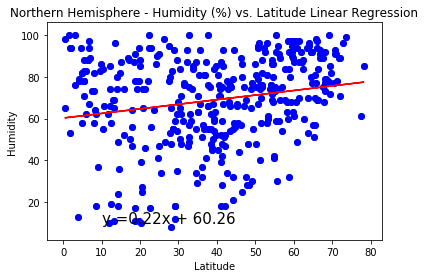

In [40]:
north_temp = df.loc[df["Lat"] >= 0, ["Lat", "Humidity"]]

x_values = north_temp["Lat"]
y_values = north_temp["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="black")
plt.scatter(x_values,y_values,color='blue')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("..nh_humidity_lr.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

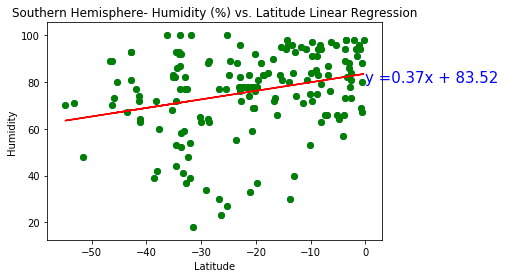

In [39]:
south_temp = df.loc[df["Lat"] <= 0, ["Lat", "Humidity"]]

x_values = south_temp["Lat"]
y_values = south_temp["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-0,80),fontsize=15,color="blue")
plt.scatter(x_values,y_values,color= "green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere- Humidity (%) vs. Latitude Linear Regression")
plt.savefig("..sh_humidity_lr.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

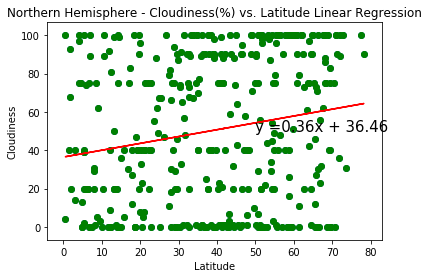

In [38]:
north_temp = df.loc[df["Lat"] >= 0, ["Lat", "Cloudiness"]]

x_values = north_temp["Lat"]
y_values = north_temp["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="black")
plt.scatter(x_values,y_values,color= "green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.savefig("..nh_cloud_lr.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

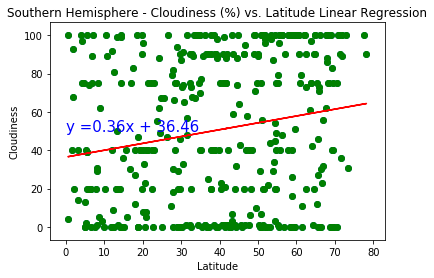

In [37]:
south_temp = df.loc[df["Lat"] >= 0, ["Lat", "Cloudiness"]]

x_values = south_temp["Lat"]
y_values = south_temp["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-0,50),fontsize=15,color="blue")
plt.scatter(x_values,y_values,color= "green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("..lr_cloud_sh.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

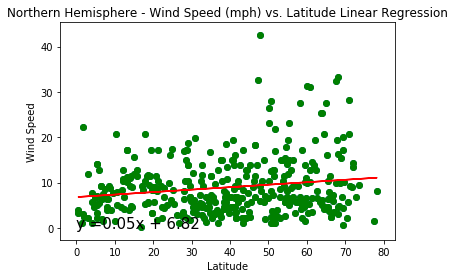

In [36]:
north_temp = df.loc[df["Lat"] >= 0, ["Lat", "Wind Speed"]]

x_values = north_temp["Lat"]
y_values = north_temp["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="black")
plt.scatter(x_values,y_values, color= "green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("..lr_nh_ws.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

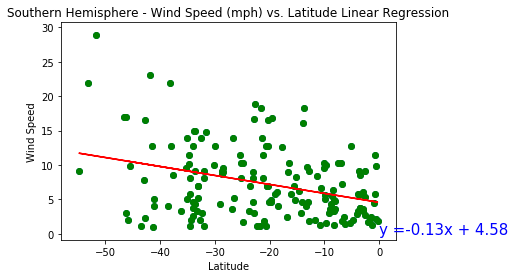

In [35]:
south_temp = df.loc[df["Lat"] <= 0, ["Lat", "Wind Speed"]]

x_values = south_temp["Lat"]
y_values = south_temp["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="blue")
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("..wind_speed.png")
plt.show()